In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('allData.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54490 entries, 0 to 54489
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                54490 non-null  object
 1   trending_date           54490 non-null  object
 2   title                   54490 non-null  object
 3   channel_title           54490 non-null  object
 4   category_id             54490 non-null  int64 
 5   publish_time            54490 non-null  object
 6   tags                    54490 non-null  object
 7   views                   54490 non-null  int64 
 8   likes                   54490 non-null  int64 
 9   dislikes                54490 non-null  int64 
 10  comment_count           54490 non-null  int64 
 11  thumbnail_link          54490 non-null  object
 12  comments_disabled       54490 non-null  bool  
 13  ratings_disabled        54490 non-null  bool  
 14  video_error_or_removed  54490 non-null  bool  
 15  de

In [4]:
# trending_date trước khi chuyển đổi    
data[['trending_date']].head()

,trending_date
0,17.14.11
1,17.14.11
2,17.14.11
3,17.14.11
4,17.14.11


In [5]:
# Chuyển đổi cột 'trending_date' từ định dạng YY.DD.MM sang YYYY-MM-DD
def convert(date):
    # Tách các phần tử YY, DD, MM
    yy, dd, mm = map(int, date.split('.'))
    # Chuyển đổi thành định dạng YYYY-MM-DD
    return f"20{yy:02d}-{mm:02d}-{dd:02d}"

In [6]:
# Áp dụng hàm chuyển đổi cho cột 'trending_date'
data['trending_date'] = data['trending_date'].apply(convert)

In [7]:
# Kiểm tra kết quả
data[['trending_date']].head()

,trending_date
0,2017-11-14
1,2017-11-14
2,2017-11-14
3,2017-11-14
4,2017-11-14


In [8]:
# Chuyển đổi ngày tháng thành kiểu datetime
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%Y-%m-%d')
data['publish_time'] = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [9]:
# Kiểm tra giá trị thiếu và xử lý
data.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               555
dtype: int64

In [10]:
data.fillna({
    'likes': data['likes'].mean(), 
    'dislikes': data['dislikes'].mean(), 
    'comment_count': 0
}, inplace=True)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


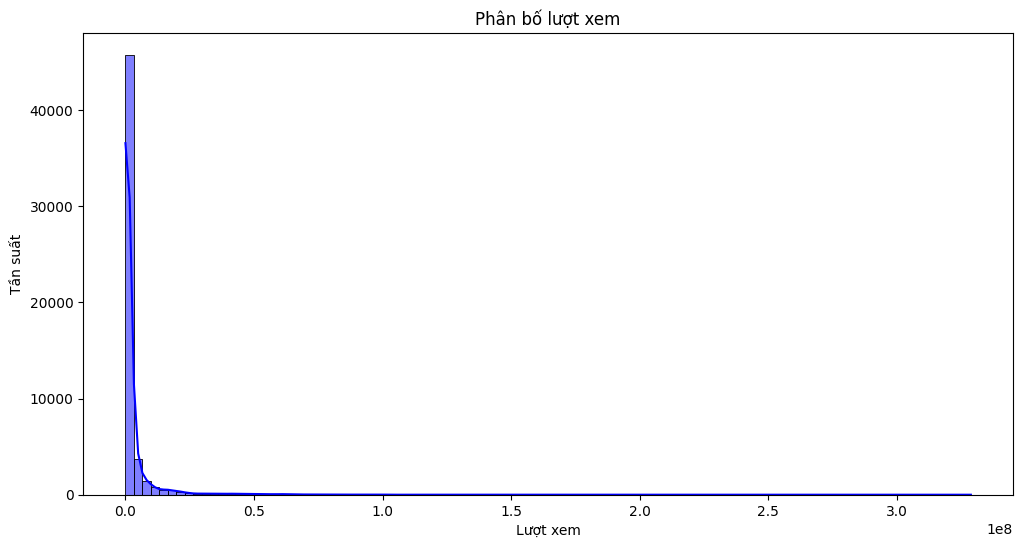

In [12]:
# Biểu đồ phân bố của lượt xem, lượt thích, và lượt bình luận
plt.figure(figsize=(12, 6))
sns.histplot(data['views'], kde=True, color='blue', bins=100)
plt.title('Phân bố lượt xem')
plt.xlabel('Lượt xem')
plt.ylabel('Tần suất')
plt.show()

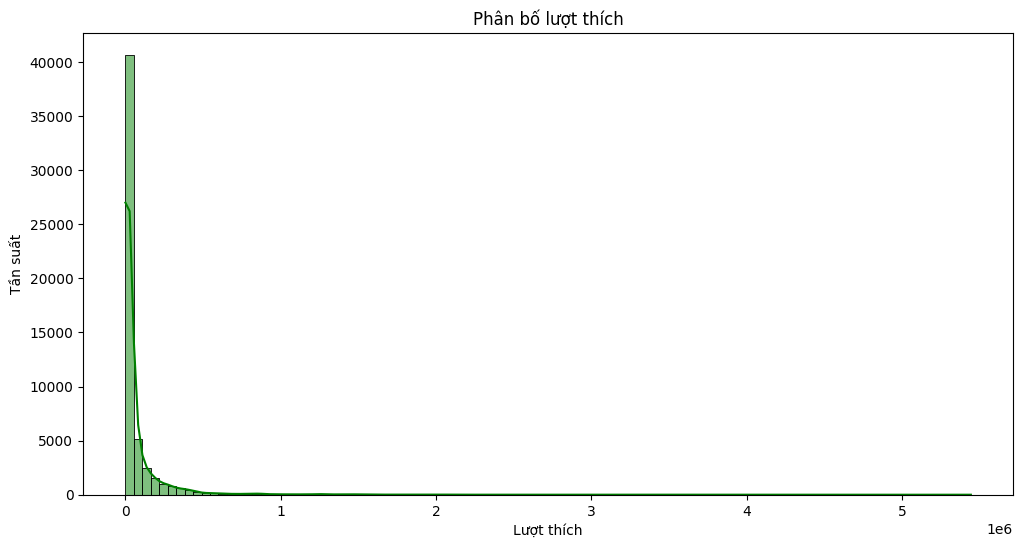

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data['likes'], kde=True, color='green', bins=100)
plt.title('Phân bố lượt thích')
plt.xlabel('Lượt thích')
plt.ylabel('Tần suất')
plt.show()

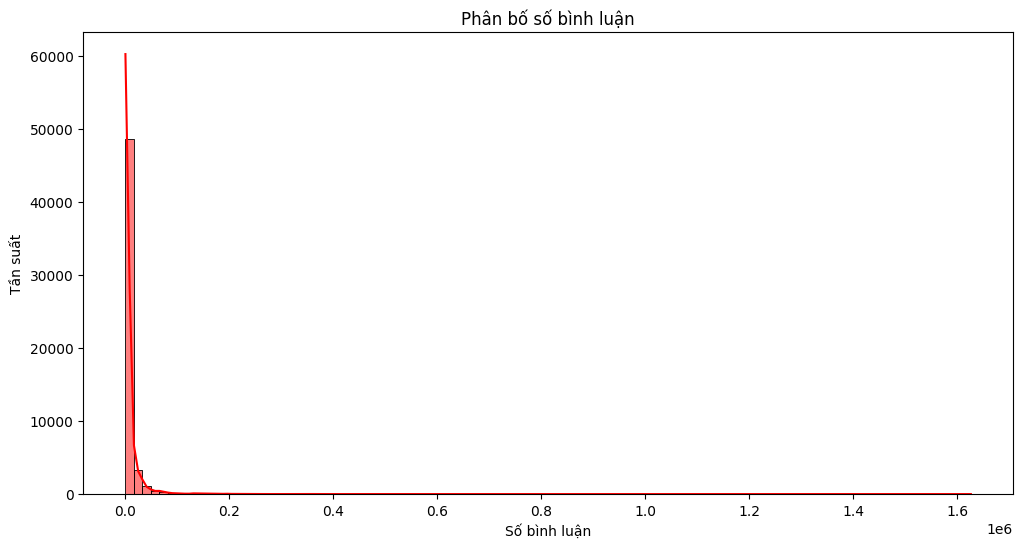

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data['comment_count'], kde=True, color='red', bins=100)
plt.title('Phân bố số bình luận')
plt.xlabel('Số bình luận')
plt.ylabel('Tần suất')
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6968\3385371275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


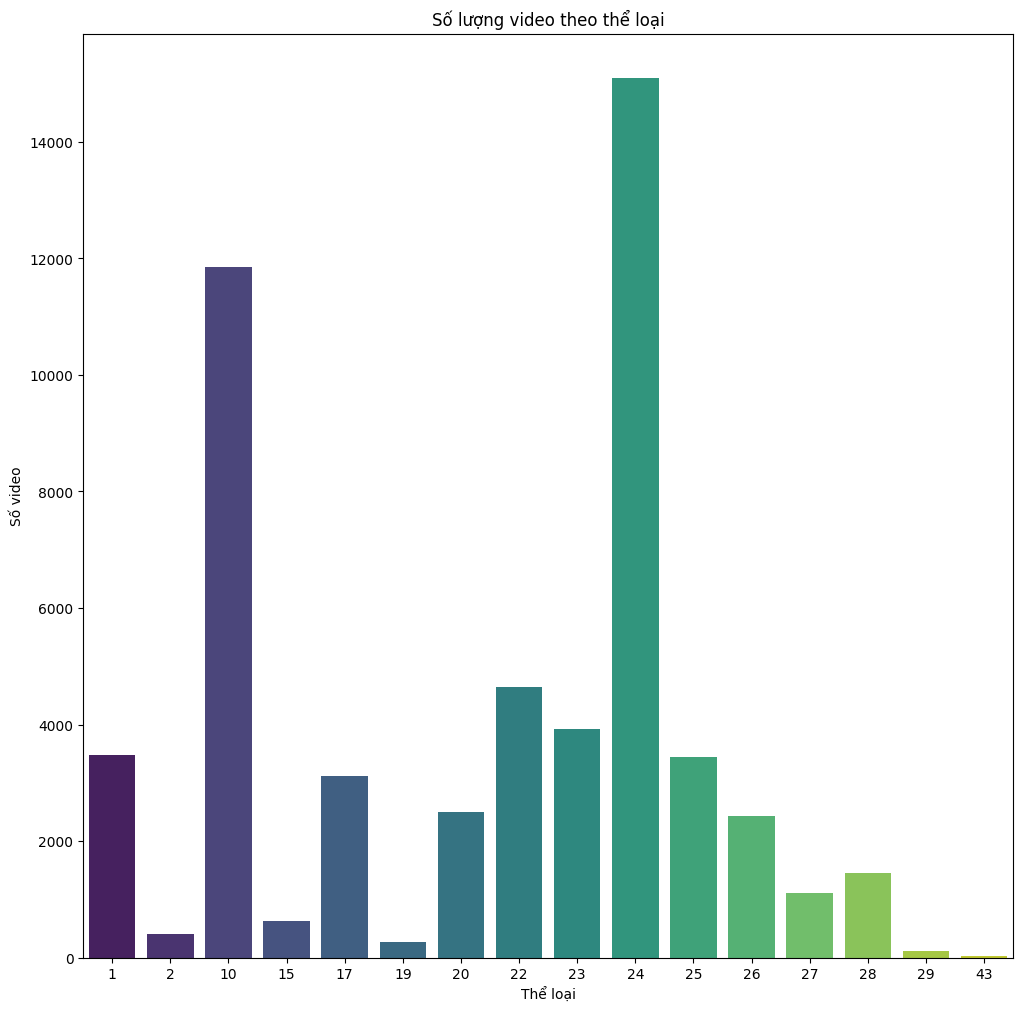

In [15]:
# Thể loại video
category_counts = data['category_id'].value_counts()
plt.figure(figsize=(12, 12))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Số lượng video theo thể loại')
plt.xlabel('Thể loại')
plt.ylabel('Số video')
plt.show()


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


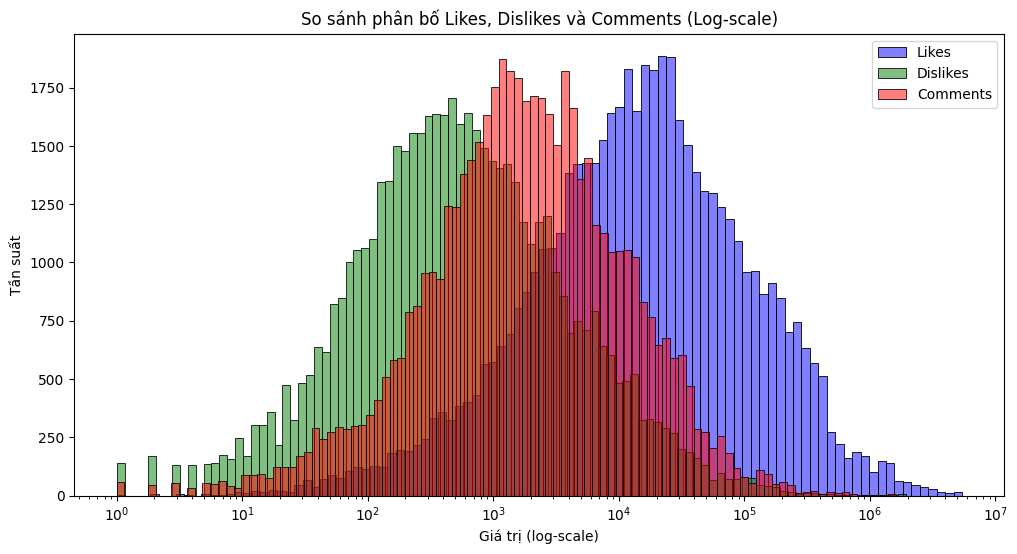

In [16]:
# Kiểm tra nếu có dislikes
if 'dislikes' not in data.columns:
    raise ValueError("Cột 'dislikes' không tồn tại trong dữ liệu.")

# Vẽ biểu đồ với log-scale để dễ so sánh
plt.figure(figsize=(12, 6))

sns.histplot(data['likes'], kde=True, color='blue', bins=100, label="Likes", log_scale=True)
sns.histplot(data['dislikes'], kde=True, color='green', bins=100, label="Dislikes", log_scale=True)
sns.histplot(data['comment_count'], kde=True, color='red', bins=100, label="Comments", log_scale=True)

# Cài đặt tiêu đề và nhãn
plt.title('So sánh phân bố Likes, Dislikes và Comments (Log-scale)')
plt.xlabel('Giá trị (log-scale)')
plt.ylabel('Tần suất')
plt.legend()

# Hiển thị biểu đồ
plt.show()

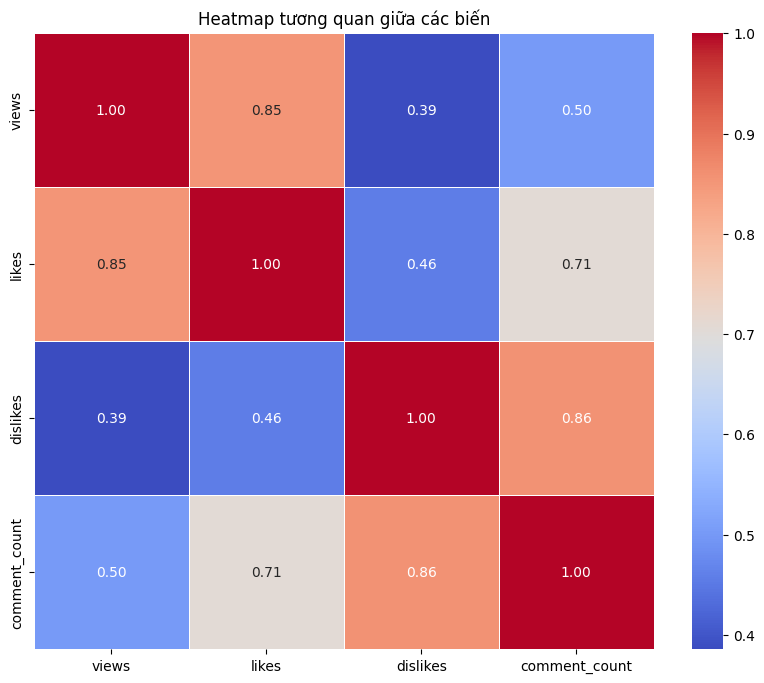

In [17]:
# Tính toán ma trận tương quan
correlation_matrix = data[['views', 'likes', 'dislikes', 'comment_count']].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap tương quan giữa các biến')
plt.show()

In [18]:
# Lọc các cột cần thiết cho mô hình
data = data[['title', 'description', 'category_id', 'likes', 'dislikes', 'comment_count', 'views']]

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
# Tạo các đặc trưng cần thiết cho mô hình
# Trí thức: Tiêu đề và mô tả (sử dụng TF-IDF)

vector_title = TfidfVectorizer(stop_words='english', max_features=5000)
vector_descrip = TfidfVectorizer(stop_words='english', max_features=5000)

#Chuyển title thành TF-IDF
X_title = vector_title.fit_transform(data['title'].fillna(''))

#Chuyển description thành TF-IDF
X_description = vector_descrip.fit_transform(data['description'].fillna(''))


In [21]:
# Kết hợp các đặc trưng
X_cognition = np.hstack([X_title.toarray(), X_description.toarray()])

In [22]:
# Cảm xúc: Lượt thích, lượt không thích, và số lượng bình luận
X_emotion = data[['likes', 'dislikes', 'comment_count']].values

In [23]:
# Hành vi: Lượt xem
X_behavior = data[['views']].values

# Kết hợp các yếu tố trí thức, cảm xúc và hành vi
X = np.hstack([X_cognition, X_emotion, X_behavior])

# Biến mục tiêu: Dự đoán thể loại video hoặc sự thành công (ví dụ: lượt xem hoặc lượt thích)
y = data['category_id']  # Hoặc có thể là 'views' nếu muốn dự đoán lượt xem
print(y)

0        23
1        10
2        23
3        22
4        22
         ..
54485    10
54486    10
54487    10
54488    24
54489    10
Name: category_id, Length: 54490, dtype: int64


In [24]:
!pip install pgmpy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import BayesianRidge
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from sklearn.feature_extraction.text import TfidfVectorizer
from pgmpy.estimators import BayesianEstimator

In [26]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Chỉ giữ lại các cột cần thiết
columns_to_keep = ['category_id', 'likes', 'dislikes', 'comment_count', 'views']
df_bmf = data[columns_to_keep].copy()  # Dùng .copy() để tránh SettingWithCopyWarning

df_bmf['category_id'] = df_bmf['category_id'].astype("category")

# Chuyển các cột số về dạng số nguyên (int)
df_bmf['likes'] = pd.to_numeric(df_bmf['likes'], downcast="integer")
df_bmf['dislikes'] = pd.to_numeric(df_bmf['dislikes'], downcast="integer")
df_bmf['comment_count'] = pd.to_numeric(df_bmf['comment_count'], downcast="integer")
df_bmf['views'] = pd.to_numeric(df_bmf['views'], downcast="integer")


# Xây dựng mô hình Bayesian Network
# định nghĩa cấu trúc mô hình phù hợp với dữ liệu
model_bmf = BayesianNetwork([
    ('category_id', 'views'),
    ('category_id', 'likes'),
    ('likes', 'dislikes'),
])

In [98]:
from pgmpy.estimators import BayesianEstimator

model_bmf.fit(df_bmf, estimator=BayesianEstimator, prior_type="BDeu", equivalent_sample_size=10)


equivalent_sample_size đại diện cho số lượng quan sát giả định (prior sample) mà chúng ta thêm vào trước khi nhìn thấy dữ liệu thực tế.
Nó giúp làm trơn các xác suất có điều kiện, tránh xác suất bằng 0 nếu một số tổ hợp dữ liệu hiếm hoặc không xuất hiện trong tập dữ liệu huấn luyện.
Nếu giá trị này lớn, mô hình sẽ bị ảnh hưởng nhiều bởi phân phối tiên nghiệm (prior), tức là mô hình sẽ ít bị ảnh hưởng bởi dữ liệu thực tế.
Nếu giá trị này nhỏ, mô hình sẽ phụ thuộc nhiều hơn vào dữ liệu quan sát được.

In [99]:
for cpd in model_bmf.get_cpds():
    total_prob = cpd.values.sum(axis=0)  # Tổng theo từng cột (điều kiện)
    print(f"Tổng xác suất của {cpd.variable}: {total_prob}")


Tổng xác suất của category_id: 1.0
Tổng xác suất của views: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Tổng xác suất của likes: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Tổng xác suất của dislikes: [1. 1. 1. ... 1. 1. 1.]


In [101]:
print(df_bmf['likes'].unique())  # Kiểm tra các giá trị hợp lệ của likes


[ 127794 1634130  187464 ...   61998  394830  151870]


In [150]:
#dự đoán

from pgmpy.inference import VariableElimination

#lấy ngẫu nhiên giá trị likes và views trong data để dự đoán
random_like = np.random.choice(data['likes'])
random_view = np.random.choice(data['views'])
random_dislikes = np.random.choice(data['dislikes'])

# Khởi tạo bộ suy luận
inference = VariableElimination(model_bmf)

# Dự đoán xác suất phân bố của biến 'category_id' khi biết views và likes
query_result = inference.query(variables=['category_id'], evidence={'views': random_view, 'likes': random_like, 'dislikes': random_dislikes})

print(f"Dự đoán với likes = {random_like} và views = {random_view}, dislikes = {random_dislikes}")
print(query_result)
 



Dự đoán với likes = 15638 và views = 161060, dislikes = 172
+-----------------+--------------------+
| category_id     |   phi(category_id) |
+=================+====================+
| category_id(1)  |             0.0000 |
+-----------------+--------------------+
| category_id(2)  |             0.0000 |
+-----------------+--------------------+
| category_id(10) |             0.2322 |
+-----------------+--------------------+
| category_id(15) |             0.0000 |
+-----------------+--------------------+
| category_id(17) |             0.0000 |
+-----------------+--------------------+
| category_id(19) |             0.0001 |
+-----------------+--------------------+
| category_id(20) |             0.0000 |
+-----------------+--------------------+
| category_id(22) |             0.0000 |
+-----------------+--------------------+
| category_id(23) |             0.0000 |
+-----------------+--------------------+
| category_id(24) |             0.0000 |
+-----------------+-------------------

Naive Bayes

In [32]:
#huấn luyện mô hình Naive bayes
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

y_pred_NB = model_NB.predict(X_test)
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           1       0.09      0.05      0.07       706
           2       0.07      0.09      0.08        93
          10       0.49      0.17      0.25      2411
          15       0.04      0.15      0.07       130
          17       0.07      0.06      0.06       589
          19       0.00      0.16      0.01        55
          20       0.10      0.09      0.09       513
          22       0.12      0.01      0.02       950
          23       0.11      0.31      0.16       751
          24       0.21      0.01      0.03      2994
          25       0.37      0.32      0.34       706
          26       0.12      0.05      0.07       458
          27       0.06      0.16      0.09       216
          28       0.04      0.04      0.04       294
          29       0.00      0.07      0.00        27
          43       0.01      0.60      0.01         5

    accuracy                           0.11     10898
   macro avg       0.12   

Random Forest

In [33]:
# Huấn luyện mô hình Random Forest
model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
print("KQ dự đoán: ")
print(y_pred)
print("\nĐánh giá:")
print(classification_report(y_test, y_pred))



KQ dự đoán: 
[22 22 24 ... 24 25 10]

Đánh giá:
              precision    recall  f1-score   support

           1       0.99      0.96      0.97       706
           2       0.99      0.71      0.82        93
          10       1.00      0.99      0.99      2411
          15       1.00      0.95      0.98       130
          17       0.95      0.93      0.94       589
          19       1.00      0.93      0.96        55
          20       0.99      0.93      0.96       513
          22       0.95      0.91      0.93       950
          23       0.99      0.93      0.96       751
          24       0.91      0.99      0.95      2994
          25       0.95      0.94      0.95       706
          26       0.99      0.95      0.97       458
          27       1.00      0.93      0.96       216
          28       0.98      0.92      0.95       294
          29       1.00      0.96      0.98        27
          43       1.00      1.00      1.00         5

    accuracy                    